## Bering NCEP/NCAR Reanalysis MSLP data for Bering Sea region

In [ ]:
%matplotlib inline

In [2]:
#using xarray for data read
import xarray as xa
from netCDF4 import num2date
import numpy as np

#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

/Volumes/WDC_internal/Users/bell/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Gather data from ESRL THREDDS server for Reanalysis II mslp data

NCEP/DOE 2 Reanalysis data provided by the NOAA/OAR/ESRL PSD, Boulder, Colorado, USA, from their Web site at http://www.esrl.noaa.gov/psd/ 

In [54]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis2.dailyavgs/surface/'

tfile = 'mslp.1979.nc'

The mask/scale function didn't work on readin of the esrl file... error is that \_Fillvalue and missing_value are different.  scale must be applied independantly or missing value should be properly set

In [79]:
### list of doy groupings for 8 day averages
doy_start = [335,343,351,359,2,10,18,26]
doy_end = [342,350,358,1,9,17,25,33]

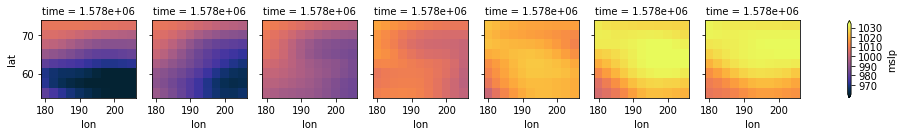

In [67]:
cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath+tfile, concat_characters=True, mask_and_scale=False, decode_times=True, decode_coords=True, drop_variables=None) as xadf:
    pd = xdf.isel(time=slice(-7,None),lat=slice(7,15),lon=slice(72,83))
    facet = ((pd['mslp']+pd.mslp.add_offset)/100.).plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2),cmap=cmap)

In [147]:
xadf = xa.open_dataset(threddspath+tfile, decode_cf=False)

pd = xdf.isel(time=slice(335,342+1),lat=slice(7,15),lon=slice(72,83))

In [148]:
#map to cf conventions
pd =xa.decode_cf(pd,mask_and_scale=False,decode_times=True).mslp

In [156]:
eightdayave = pd.groupby(pd['time.dayofyear']).mean('time')

In [170]:
size = 1
for dim in np.shape(eightdayave): size *= dim
print eightdayave.data.reshape(1,size)[0]

[-10669. -10681. -10661. -10599. -10499. -10361. -10209. -10049.  -9899.
  -9764.  -9649. -11336. -11461. -11499. -11449. -11319. -11129. -10924.
 -10734. -10571. -10439. -10329. -12054. -12206. -12221. -12089. -11829.
 -11509. -11191. -10899. -10664. -10499. -10394. -12294. -12426. -12404.
 -12219. -11931. -11576. -11189. -10821. -10499. -10254. -10099. -11654.
 -11719. -11659. -11514. -11314. -11074. -10799. -10504. -10231. -10029.
  -9924. -10711. -10659. -10554. -10434. -10326. -10224. -10114. -10014.
  -9941.  -9911.  -9941.  -9799.  -9716.  -9624.  -9549.  -9491.  -9459.
  -9489.  -9601.  -9789.  -9999. -10171.  -9006.  -8896.  -8826.  -8784.
  -8756.  -8776.  -8876.  -9114.  -9491.  -9934. -10301. -11156. -11211.
 -11199. -11126. -11006. -10861. -10709. -10546. -10386. -10226. -10051.
 -11316. -11509. -11576. -11549. -11436. -11266. -11071. -10869. -10659.
 -10459. -10264. -11071. -11294. -11406. -11414. -11334. -11201. -11034.
 -10811. -10536. -10224.  -9916. -10889. -11054. -1